In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(213, 212, 3)


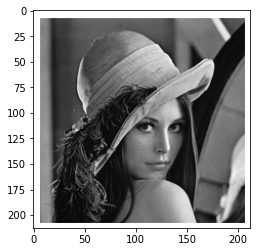

In [27]:
img = mpimg.imread('./doc/pca/original.png')
plt.imshow(img)
print(img.shape)

(90, 90)


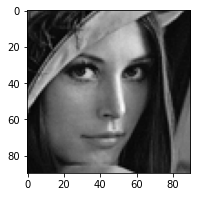

In [14]:
#Reducing the amount of pixels
img_first_channel = img[:,:,0]
img_first_channel.shape
img_first_channel = img_first_channel[80:170,80:170]
print(img_first_channel.shape)

fig, ax = plt.subplots(figsize=(6, 3))
ax.imshow(img_first_channel, cmap='gray')

In [15]:
plain = img_first_channel.reshape((1,-1)) #Flatten image
plain.shape

(1, 8100)

In [16]:
#Defining the goal
features = plain.shape[1]
obj = features-2
print(features, obj)

8100 8098


Epoch 1 ==> Loss: 0.335785835981369
Epoch 2 ==> Loss: 0.27908286452293396
Epoch 3 ==> Loss: 0.24370837211608887
Epoch 4 ==> Loss: 0.22335833311080933
Epoch 5 ==> Loss: 0.1982089728116989
Epoch 6 ==> Loss: 0.19617895781993866
Epoch 7 ==> Loss: 0.19259920716285706
Epoch 8 ==> Loss: 0.187851682305336
Epoch 9 ==> Loss: 0.1847371757030487
Epoch 10 ==> Loss: 0.1847546100616455
Epoch 11 ==> Loss: 0.1816328465938568
Epoch 12 ==> Loss: 0.17820899188518524
Epoch 13 ==> Loss: 0.18407729268074036
Epoch 14 ==> Loss: 0.18434841930866241
Epoch 15 ==> Loss: 0.1815970242023468
Epoch 16 ==> Loss: 0.18672654032707214
Epoch 17 ==> Loss: 0.17959508299827576
Epoch 18 ==> Loss: 0.18181197345256805
Epoch 19 ==> Loss: 0.1852150410413742
Epoch 20 ==> Loss: 0.18719662725925446
Epoch 21 ==> Loss: 0.18633244931697845
Epoch 22 ==> Loss: 0.18554136157035828
Epoch 23 ==> Loss: 0.18689987063407898
Epoch 24 ==> Loss: 0.18589186668395996
Epoch 25 ==> Loss: 0.18488049507141113
Epoch 26 ==> Loss: 0.18927311897277832
Epoch

Epoch 211 ==> Loss: 0.31632325053215027
Epoch 212 ==> Loss: 0.32384344935417175
Epoch 213 ==> Loss: 0.3235544264316559
Epoch 214 ==> Loss: 0.31521502137184143
Epoch 215 ==> Loss: 0.3174639046192169
Epoch 216 ==> Loss: 0.3160085380077362
Epoch 217 ==> Loss: 0.3119393289089203
Epoch 218 ==> Loss: 0.3146790862083435
Epoch 219 ==> Loss: 0.3209952414035797
Epoch 220 ==> Loss: 0.318693608045578
Epoch 221 ==> Loss: 0.3195137679576874
Epoch 222 ==> Loss: 0.3127773702144623
Epoch 223 ==> Loss: 0.3165217638015747
Epoch 224 ==> Loss: 0.3191898465156555
Epoch 225 ==> Loss: 0.31807684898376465
Epoch 226 ==> Loss: 0.3052973449230194
Epoch 227 ==> Loss: 0.3026263117790222
Epoch 228 ==> Loss: 0.30776840448379517
Epoch 229 ==> Loss: 0.30964887142181396
Epoch 230 ==> Loss: 0.30716371536254883
Epoch 231 ==> Loss: 0.31359556317329407
Epoch 232 ==> Loss: 0.31585654616355896
Epoch 233 ==> Loss: 0.31266793608665466
Epoch 234 ==> Loss: 0.30773401260375977
Epoch 235 ==> Loss: 0.3092871606349945
Epoch 236 ==> L

Epoch 420 ==> Loss: 0.2577286958694458
Epoch 421 ==> Loss: 0.2605953514575958
Epoch 422 ==> Loss: 0.2590426802635193
Epoch 423 ==> Loss: 0.2618918716907501
Epoch 424 ==> Loss: 0.2662748396396637
Epoch 425 ==> Loss: 0.2597142159938812
Epoch 426 ==> Loss: 0.2622646689414978
Epoch 427 ==> Loss: 0.2643203139305115
Epoch 428 ==> Loss: 0.2586897313594818
Epoch 429 ==> Loss: 0.2645357847213745
Epoch 430 ==> Loss: 0.2613312602043152
Epoch 431 ==> Loss: 0.25661519169807434
Epoch 432 ==> Loss: 0.2622791826725006
Epoch 433 ==> Loss: 0.2563339173793793
Epoch 434 ==> Loss: 0.2616919279098511
Epoch 435 ==> Loss: 0.25923779606819153
Epoch 436 ==> Loss: 0.25540870428085327
Epoch 437 ==> Loss: 0.2568001449108124
Epoch 438 ==> Loss: 0.2554735839366913
Epoch 439 ==> Loss: 0.25747406482696533
Epoch 440 ==> Loss: 0.2581949532032013
Epoch 441 ==> Loss: 0.25381341576576233
Epoch 442 ==> Loss: 0.25577178597450256
Epoch 443 ==> Loss: 0.2601358890533447
Epoch 444 ==> Loss: 0.2532426118850708
Epoch 445 ==> Loss:

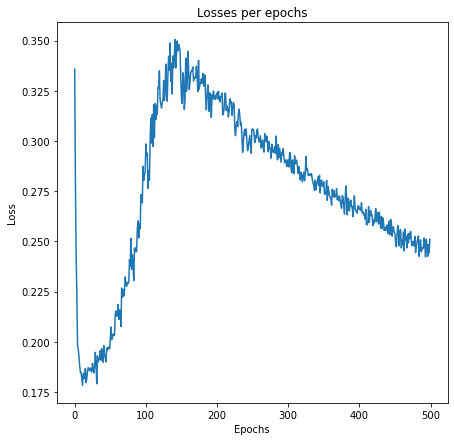

In [17]:
# Creating the model
%run "./RBM.py"

neural_net = RBM(features, obj)
history = neural_net.train(plain, l2_cost, verbose = True)

## showing stats
def plot(losses):
    plt.figure(figsize=(7, 7))
    plt.title('Losses per epochs')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(losses)
    
plot(history)

Text(0.5, 0.98, 'RBM')

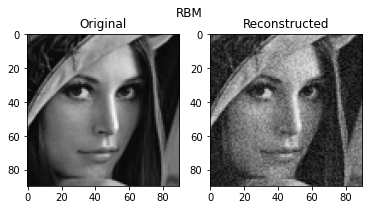

In [26]:
#Testing the network
reconstructed = neural_net.getReconstructedOutput(plain)

_aux = int(features ** (1/2))

fig, (vax, hax) = plt.subplots(1, 2, figsize=(6, 3))
vax.imshow(img_first_channel, cmap='gray')
vax.set_title('Original')
hax.imshow(reconstructed.reshape((1,_aux,_aux))[0], cmap='gray')
hax.set_title('Reconstructed')
plt.suptitle('RBM')